In [1]:
import cudf

# Load the aggregated dataset
higgs = cudf.read_csv("HIGGS_HEADER.csv")
print("Dataset shape:", higgs.shape)

# Count the number of instances for each class
class_counts = higgs['class_label'].value_counts()

print("Number of instances in each class:")
print(class_counts)


Dataset shape: (11000000, 29)
Number of instances in each class:
class_label
1.0    5829123
0.0    5170877
Name: count, dtype: int64


In [1]:
%%time
import cudf

# Load the dataset
higgs = cudf.read_csv("HIGGS_HEADER.csv")
print("Original data shape:", higgs.shape)

# Determine the number of full groups
group_size = 11
n_full = (len(higgs) // group_size) * group_size
higgs_trim = higgs.iloc[:n_full]  # Trim to a multiple of 11

# Separate the label from the features
features = higgs_trim.drop(columns=['class_label'])
labels = higgs_trim['class_label']

# Group and average the features
features_agg = features.groupby(features.index // group_size).mean()

# Majority-vote the label: if mean(label) > 0.5, assign 1, else 0
# Note: If you have exactly 0.5, this code will assign 0. Adjust if needed.
labels_agg = labels.groupby(labels.index // group_size).mean()
labels_agg = (labels_agg > 0.5).astype(int)

# Combine features and aggregated labels
higgs_sampled = features_agg.copy()
higgs_sampled['class_label'] = labels_agg

# Save the aggregated dataset to a new CSV file
higgs_sampled.to_csv("higgs_aggregated_sample_1M.csv", index=False)
print("Aggregated dataset saved as higgs_aggregated_sample_1M.csv")


Original data shape: (11000000, 29)
Aggregated dataset saved as higgs_aggregated_sample.csv
CPU times: user 45.6 s, sys: 2.64 s, total: 48.3 s
Wall time: 1min 5s


In [1]:
%%time
import cudf

# Load the dataset
higgs = cudf.read_csv("HIGGS_HEADER.csv")
print("Original data shape:", higgs.shape)

# Determine the number of full groups
group_size = 110
n_full = (len(higgs) // group_size) * group_size
higgs_trim = higgs.iloc[:n_full]  # Trim to a multiple of 11

# Separate the label from the features
features = higgs_trim.drop(columns=['class_label'])
labels = higgs_trim['class_label']

# Group and average the features
features_agg = features.groupby(features.index // group_size).mean()

# Majority-vote the label: if mean(label) > 0.5, assign 1, else 0
# Note: If you have exactly 0.5, this code will assign 0. Adjust if needed.
labels_agg = labels.groupby(labels.index // group_size).mean()
labels_agg = (labels_agg > 0.5).astype(int)

# Combine features and aggregated labels
higgs_sampled = features_agg.copy()
higgs_sampled['class_label'] = labels_agg

# Save the aggregated dataset to a new CSV file
higgs_sampled.to_csv("higgs_aggregated_sample_100k.csv", index=False)
print("Aggregated dataset saved as higgs_aggregated_sample_100k.csv")


Original data shape: (11000000, 29)
Aggregated dataset saved as higgs_aggregated_sample_100k.csv
CPU times: user 52.4 s, sys: 1.94 s, total: 54.3 s
Wall time: 1min 10s


In [2]:
import cudf

# Load the dataset
higgs = cudf.read_csv("HIGGS_HEADER.csv")
print("Original data shape:", higgs.shape)

# Shuffle the dataset to randomize the order.
# Note: Using sample(frac=1) shuffles the entire DataFrame.
higgs_shuffled = higgs.sample(frac=1, random_state=42)

# Determine the number of full groups
group_size = 110
n_full = (len(higgs_shuffled) // group_size) * group_size
higgs_trim = higgs_shuffled.iloc[:n_full]  # Trim to a multiple of 110

# Separate features and labels
features = higgs_trim.drop(columns=['class_label'])
labels = higgs_trim['class_label']

# Group and average the features for each chunk
features_agg = features.groupby(features.index // group_size).mean()

# For labels, instead of taking the majority vote, pick a label at random from each group.
# Since we've shuffled the data already, simply taking the first label in each group should suffice.
labels_agg = labels.groupby(labels.index // group_size).first()

# Combine the aggregated features with the aggregated labels
higgs_sampled = features_agg.copy()
higgs_sampled['class_label'] = labels_agg

# Save the aggregated dataset to a new CSV file
higgs_sampled.to_csv("higgs_aggregated_sample.csv", index=False)
print("Aggregated dataset saved as higgs_aggregated_sample.csv")


Original data shape: (11000000, 29)
Aggregated dataset saved as higgs_aggregated_sample.csv


In [3]:
import cudf

# Load the aggregated dataset
higgs = cudf.read_csv("higgs_aggregated_sample_100k.csv")
print("Dataset shape:", higgs.shape)

# Count the number of instances for each class
class_counts = higgs['class_label'].value_counts()

print("Number of instances in each class:")
print(class_counts)


Dataset shape: (100000, 29)
Number of instances in each class:
class_label
1    70407
0    29593
Name: count, dtype: int64


In [6]:
%%time
import cudf

# Load the datasets
higgs = cudf.read_csv("higgs_aggregated_sample.csv")
print(higgs.shape)
higgs.head()

(100000, 29)
CPU times: user 202 ms, sys: 11.6 ms, total: 214 ms
Wall time: 313 ms


,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet1_pt,jet1_eta,jet1_phi,jet1_b-tag,jet2_pt,...,jet4_phi,jet4_b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb,class_label
0,0.996025,0.167380,-0.141711,0.953315,-0.049746,1.047074,0.063430,-0.025241,0.888986,0.907278,...,0.074910,1.043387,1.066264,1.015105,1.050042,0.960590,0.937886,0.994221,0.930519,1
1,1.072658,0.034548,0.120509,1.033825,-0.110276,1.048698,0.119162,-0.030896,1.007517,0.912922,...,0.094366,1.325383,0.999427,1.015231,1.048132,0.978892,0.943178,0.987584,0.950471,1
2,1.025981,0.078040,0.086327,0.975388,0.105989,0.947180,0.047155,-0.216634,0.918619,0.922518,...,-0.041992,0.972888,1.083298,0.996863,1.032153,1.001353,0.902706,1.002552,0.941709,1
3,1.024974,0.129847,-0.090506,1.030056,-0.042019,0.965350,-0.001340,0.021170,1.037150,0.960092,...,0.096427,0.845989,1.009194,0.992479,1.079685,1.043744,0.930436,1.008559,0.930091,0
4,1.104618,-0.038933,-0.101693,0.973906,0.150096,0.988550,-0.002762,-0.003166,1.135926,1.055447,...,-0.024774,0.733191,1.010470,1.034379,1.042620,1.023562,1.024291,1.066532,0.993515,1


Data shape: (100000, 29)
[2025-03-18 01:23:19.867] [CUML] [warning] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/di/miniconda3/envs/rapids-25.02/lib/python3.12/site-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


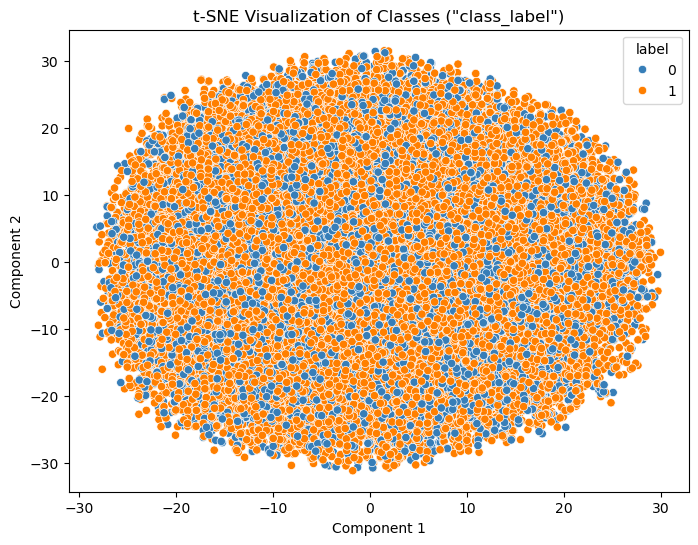

CPU times: user 8.33 s, sys: 230 ms, total: 8.56 s
Wall time: 8.69 s


In [17]:
%%time
import cudf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cuml.manifold import TSNE

# Load the aggregated dataset
higgs_aggregated = cudf.read_csv("higgs_aggregated_sample.csv")
print("Data shape:", higgs_aggregated.shape)

# Separate features and label columns using 'class_label'
features = higgs_aggregated.drop(columns=['class_label'])
labels = higgs_aggregated['class_label']

# Create a TSNE instance using the FFT approximation for speed.
tsne = TSNE(
    n_components=2,
    perplexity=30.0,
    early_exaggeration=12.0,
    learning_rate=200.0,
    n_iter=1000,
    n_neighbors=90,
    method='fft'
)

# Fit and transform the feature data to get the 2D embedding.
embedding = tsne.fit_transform(features)

# Convert the embedding explicitly to a host NumPy array, if necessary.
if hasattr(embedding, "get"):
    embedding = embedding.get()
elif hasattr(embedding, "to_numpy"):
    embedding = embedding.to_numpy()

# Create a pandas DataFrame for plotting the embedding.
embedding_df = pd.DataFrame(embedding, columns=['Component1', 'Component2'])
embedding_df['label'] = labels.to_pandas().values  # Convert cuDF Series to pandas Series

# Define the color palette for the two classes (0.0 and 1.0)
palette = ['#377eb8', '#ff7f00']

# Plot the t-SNE embedding with colors representing the classes from 'class_label'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=embedding_df, x='Component1', y='Component2', hue='label', palette=palette)
plt.title('t-SNE Visualization of Classes ("class_label")')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


---
# Stratified
---

Original dataset shape: (11000000, 29)
Original dataset class counts:
class_label
1.0    5829123
0.0    5170877
Name: count, dtype: int64
Sampling fraction: 0.00909090909090909
Sampled dataset shape: (100000, 29)
Sampled dataset class counts:
class_label
1.0    52992
0.0    47008
Name: count, dtype: int64
[2025-03-18 02:05:50.045] [CUML] [warning] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/di/miniconda3/envs/rapids-25.02/lib/python3.12/site-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


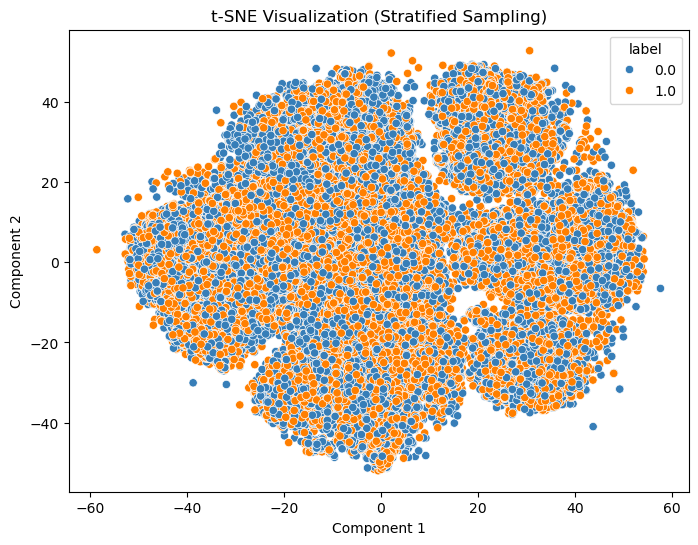

CPU times: user 40.1 s, sys: 2.09 s, total: 42.2 s
Wall time: 52.5 s


In [1]:
%%time
import cudf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cuml.manifold import TSNE

# Load the original dataset
higgs = cudf.read_csv("HIGGS_HEADER.csv")
print("Original dataset shape:", higgs.shape)
print("Original dataset class counts:")
print(higgs['class_label'].value_counts())

# Determine the overall sampling fraction to reach ~100,000 instances
target_total = 100000
frac = target_total / len(higgs)
print("Sampling fraction:", frac)

# Perform stratified sampling for each class:
sampled_class_0 = higgs[higgs['class_label'] == 0].sample(frac=frac, random_state=42)
sampled_class_1 = higgs[higgs['class_label'] == 1].sample(frac=frac, random_state=42)

# Combine the sampled data and shuffle it
higgs_sampled = cudf.concat([sampled_class_0, sampled_class_1]).sample(frac=1, random_state=42)
print("Sampled dataset shape:", higgs_sampled.shape)
print("Sampled dataset class counts:")
print(higgs_sampled['class_label'].value_counts())

# Separate features and label
features = higgs_sampled.drop(columns=['class_label'])
labels = higgs_sampled['class_label']

# Create a TSNE instance
tsne = TSNE(
    n_components=2,
    perplexity=30.0,
    early_exaggeration=12.0,
    learning_rate=200.0,
    n_iter=1000)

# Fit and transform the feature data to get the 2D embedding.
embedding = tsne.fit_transform(features)

# Convert the embedding to a NumPy array (if needed)
if hasattr(embedding, "get"):
    embedding = embedding.get()
elif hasattr(embedding, "to_numpy"):
    embedding = embedding.to_numpy()

# Create a pandas DataFrame for plotting
embedding_df = pd.DataFrame(embedding, columns=['Component1', 'Component2'])
embedding_df['label'] = labels.to_pandas().values  # Convert cuDF Series to pandas Series

# Define the color palette for the two classes
palette = ['#377eb8', '#ff7f00']

# Plot the t-SNE embedding with colors representing the classes.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=embedding_df, x='Component1', y='Component2', hue='label', palette=palette)
plt.title('t-SNE Visualization (Stratified Sampling)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()


Original dataset shape: (11000000, 29)
Original dataset class counts:
class_label
1.0    5829123
0.0    5170877
Name: count, dtype: int64
Sampling fraction: 0.09090909090909091
Sampled dataset shape: (1000000, 29)
Sampled dataset class counts:
class_label
1.0    529920
0.0    470080
Name: count, dtype: int64
[2025-03-18 02:07:18.623] [CUML] [warning] # of Nearest Neighbors should be at least 3 * perplexity. Your results might be a bit strange...


/home/di/miniconda3/envs/rapids-25.02/lib/python3.12/site-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


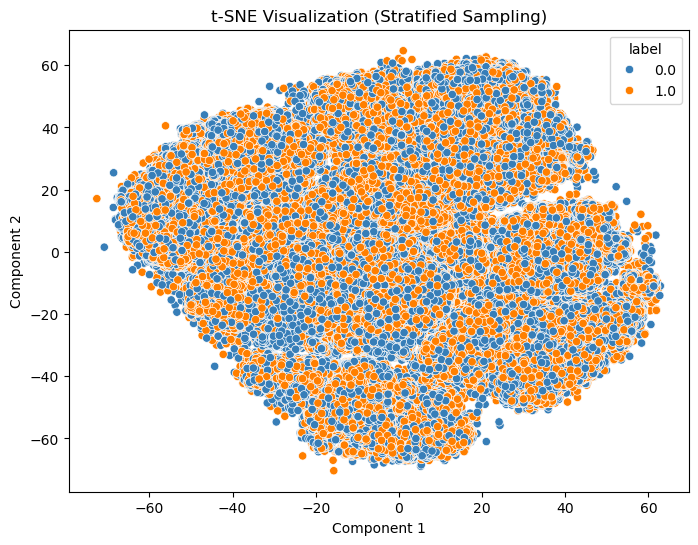

CPU times: user 3min, sys: 2.73 s, total: 3min 3s
Wall time: 3min 10s


In [2]:
%%time
import cudf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cuml.manifold import TSNE

# Load the original dataset
higgs = cudf.read_csv("HIGGS_HEADER.csv")
print("Original dataset shape:", higgs.shape)
print("Original dataset class counts:")
print(higgs['class_label'].value_counts())

# Determine the overall sampling fraction to reach ~1,000,000 instances
target_total = 1000000
frac = target_total / len(higgs)
print("Sampling fraction:", frac)

# Perform stratified sampling for each class:
sampled_class_0 = higgs[higgs['class_label'] == 0].sample(frac=frac, random_state=42)
sampled_class_1 = higgs[higgs['class_label'] == 1].sample(frac=frac, random_state=42)

# Combine the sampled data and shuffle it
higgs_sampled = cudf.concat([sampled_class_0, sampled_class_1]).sample(frac=1, random_state=42)
print("Sampled dataset shape:", higgs_sampled.shape)
print("Sampled dataset class counts:")
print(higgs_sampled['class_label'].value_counts())

# Separate features and label
features = higgs_sampled.drop(columns=['class_label'])
labels = higgs_sampled['class_label']

# Create a TSNE instance
tsne = TSNE(
    n_components=2,
    perplexity=30.0,
    early_exaggeration=12.0,
    learning_rate=200.0,
    n_iter=1000)

# Fit and transform the feature data to get the 2D embedding.
embedding = tsne.fit_transform(features)

# Convert the embedding to a NumPy array (if needed)
if hasattr(embedding, "get"):
    embedding = embedding.get()
elif hasattr(embedding, "to_numpy"):
    embedding = embedding.to_numpy()

# Create a pandas DataFrame for plotting
embedding_df = pd.DataFrame(embedding, columns=['Component1', 'Component2'])
embedding_df['label'] = labels.to_pandas().values  # Convert cuDF Series to pandas Series

# Define the color palette for the two classes
palette = ['#377eb8', '#ff7f00']

# Plot the t-SNE embedding with colors representing the classes.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=embedding_df, x='Component1', y='Component2', hue='label', palette=palette)
plt.title('t-SNE Visualization (Stratified Sampling)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()
